# Sphere Models

In this section, we describe restricted sphere models, which have been used to represent (tumor)-cells.

Sphere's by their nature have no orientations. Their only parameter is their diameter.

Similarly to Cylinder models, Spheres have different model approximations that make different assumptions on the acquisition scheme. We start with describing the simplest Dot model (S1), and more towards more general models (S4).

# Dot: S1
The Dot model represents a non-diffusing component, which could represent trapped water in glial cells*(Stanisz et al. 1997)*, or axons with a different orientation to the main bundle*(Panagiotaki et al. 2009)*.
Notably, *(Alexander et al. 2010, Veraart et al. 2016)* mentions that the contribution of the Dot model is negligible in \emph{in-vivo} acquisitions. 
The signal of a Dot is described by a sphere with a diameter of zero, or equivalently an isotropic Gaussian compartment with $\lambda_{iso}$ set to zero. In other words, it's just a function returning one no matter the input:

\begin{equation}
 E_{\textrm{dot}}=1.
\end{equation}

In [1]:
from dmipy.signal_models import sphere_models
dot = sphere_models.S1Dot()

## Soderman Sphere: S2
To keep naming consistency with the cylinder model with the same acquisition assumptions we call this the Soderman Sphere, but the equation is given by *(Balinov et al. 1993)*. The radius $R$ now corresponds to the radius of the sphere.

\begin{equation}
E(q,R|\delta\rightarrow0,\Delta\gg R^2/D)=\left(\frac{3}{(2\pi q R) ^ 2}\left(\frac{\sin(2\pi q R)}{(2\pi q R)} - \cos(2\pi q R)\right)\right) ^2
\end{equation}

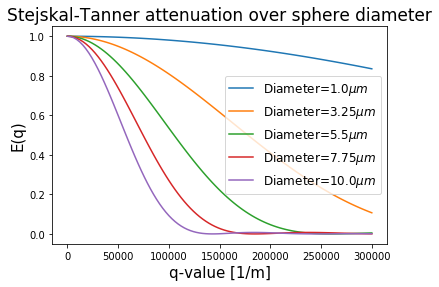

In [2]:
import numpy as np
from dmipy.core.acquisition_scheme import acquisition_scheme_from_qvalues
sphere_stejskal_tanner = sphere_models.S2SphereStejskalTannerApproximation()

Nsamples = 100
bvecs = np.tile(np.r_[0., 1., 0.], (Nsamples, 1))  # doesn't matter it has no orientation
qvals = np.linspace(0, 3e5, Nsamples)
delta = 0.01
Delta = 0.03
scheme = acquisition_scheme_from_qvalues(qvals, bvecs, delta, Delta)

import matplotlib.pyplot as plt
%matplotlib inline
for diameter in np.linspace(1e-6, 1e-5, 5):
    plt.plot(qvals, sphere_stejskal_tanner(scheme, diameter=diameter),
             label="Diameter="+str(1e6 * diameter)+"$\mu m$")
plt.legend(fontsize=12)
plt.title("Stejskal-Tanner attenuation over sphere diameter", fontsize=17)
plt.xlabel("q-value [1/m]", fontsize=15)
plt.ylabel("E(q)", fontsize=15);

## Callaghan Sphere: S3
*(Callaghan 1995)*. Coming Soon...

## Gaussian Phase Sphere: S4
*(Balinov et al. 1993)* derived the formulation of the Gaussian-Phase approximation for spheres, which models the signal attenuation for finite pulse duration $\delta$ and pulse separation $\Delta$. This approximation has been used for the VERDICT model for tumor characterization *(Panagiotaki et al. 2014)*.

\begin{equation}
\ln\left[E_\perp(G,\delta,\Delta,R)\right]=\frac{2\gamma^2 G^2}{D}\sum_{m=1}^{\infty}\frac{a_m^{-4}}{a^2_mR^2-2}\times\left[2\delta-\dfrac{2 + e^{-a_m^2D(\Delta-\delta)} - 2e^{-a_m^2D\delta} - 2e^{-a_m^2D\Delta}+e^{-a_m^2D(\Delta+\delta)}}{a_m^2D}\right]
\end{equation}

In [3]:
gaussian_phase = sphere_models.S4SphereGaussianPhaseApproximation()

## References
<div class="cite2c-biblio"></div>

- Balinov, Balin, et al. "The NMR self-diffusion method applied to restricted diffusion. Simulation of echo attenuation from molecules in spheres and between planes." Journal of Magnetic Resonance, Series A 104.1 (1993): 17-25.
- Callaghan, Paul T. "Pulsed-gradient spin-echo NMR for planar, cylindrical, and spherical pores under conditions of wall relaxation." Journal of magnetic resonance, Series A 113.1 (1995): 53-59. 
- Stanisz, Greg J., et al. "An analytical model of restricted diffusion in bovine optic nerve." Magnetic Resonance in Medicine 37.1 (1997): 103-111.
- Panagiotaki, Eleftheria, et al. "Two-compartment models of the diffusion MR signal in brain white matter." International Conference on Medical Image Computing and Computer-Assisted Intervention. Springer, Berlin, Heidelberg, 2009.
- Alexander, Daniel C., et al. "Orientationally invariant indices of axon diameter and density from diffusion MRI." Neuroimage 52.4 (2010): 1374-1389.
- Veraart, Jelle, Els Fieremans, and Dmitry S. Novikov. "Universal power-law scaling of water diffusion in human brain defines what we see with MRI." arXiv preprint arXiv:1609.09145 (2016).
- Panagiotaki, Eletheria, et al. "Noninvasive quantification of solid tumor microstructure using VERDICT MRI." Cancer research 74.7 (2014): 1902-1912.